<h1>THYROID CANCER PREDICTION USING LOGISTIC REGRESSION</h1>

DATASET - https://www.kaggle.com/datasets/bibin2001/thyroid-cancer-predition


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('thyroid_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [9]:
data.shape

(569, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


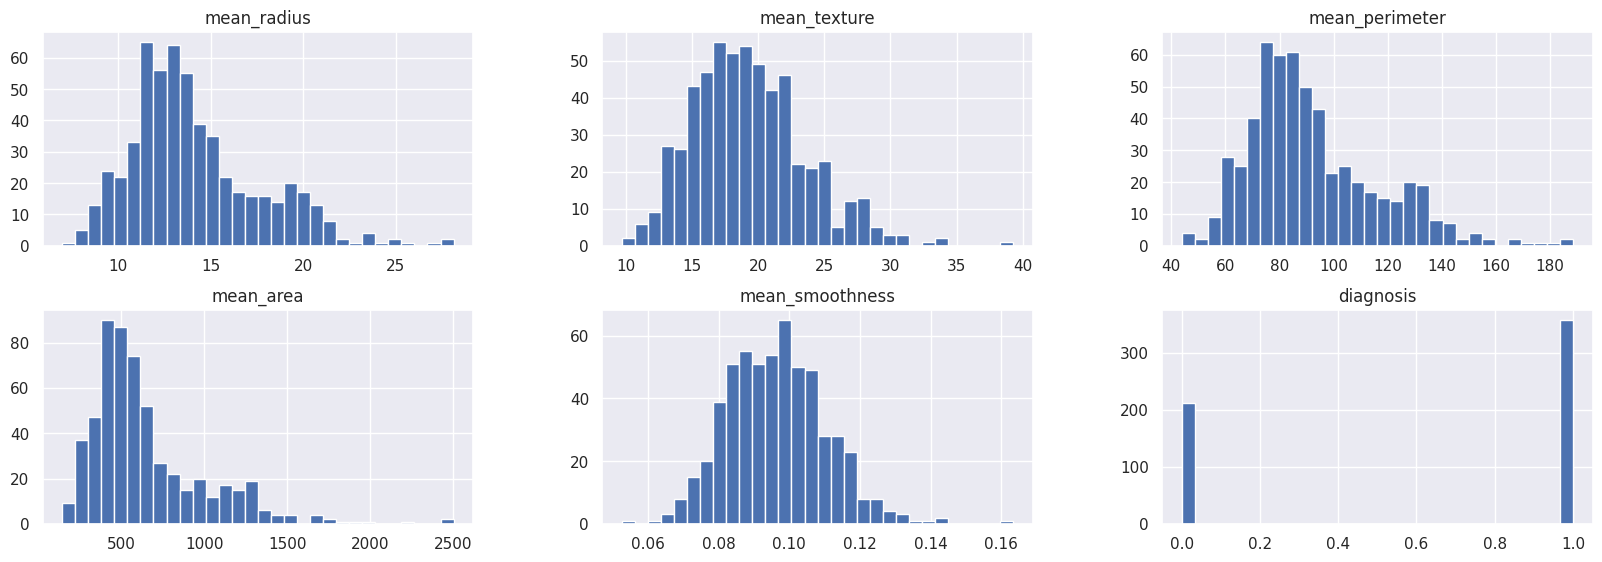

In [11]:
data.hist(bins = 30, figsize= (20, 10), layout=(3, 3) )
plt.show()

<Axes: >

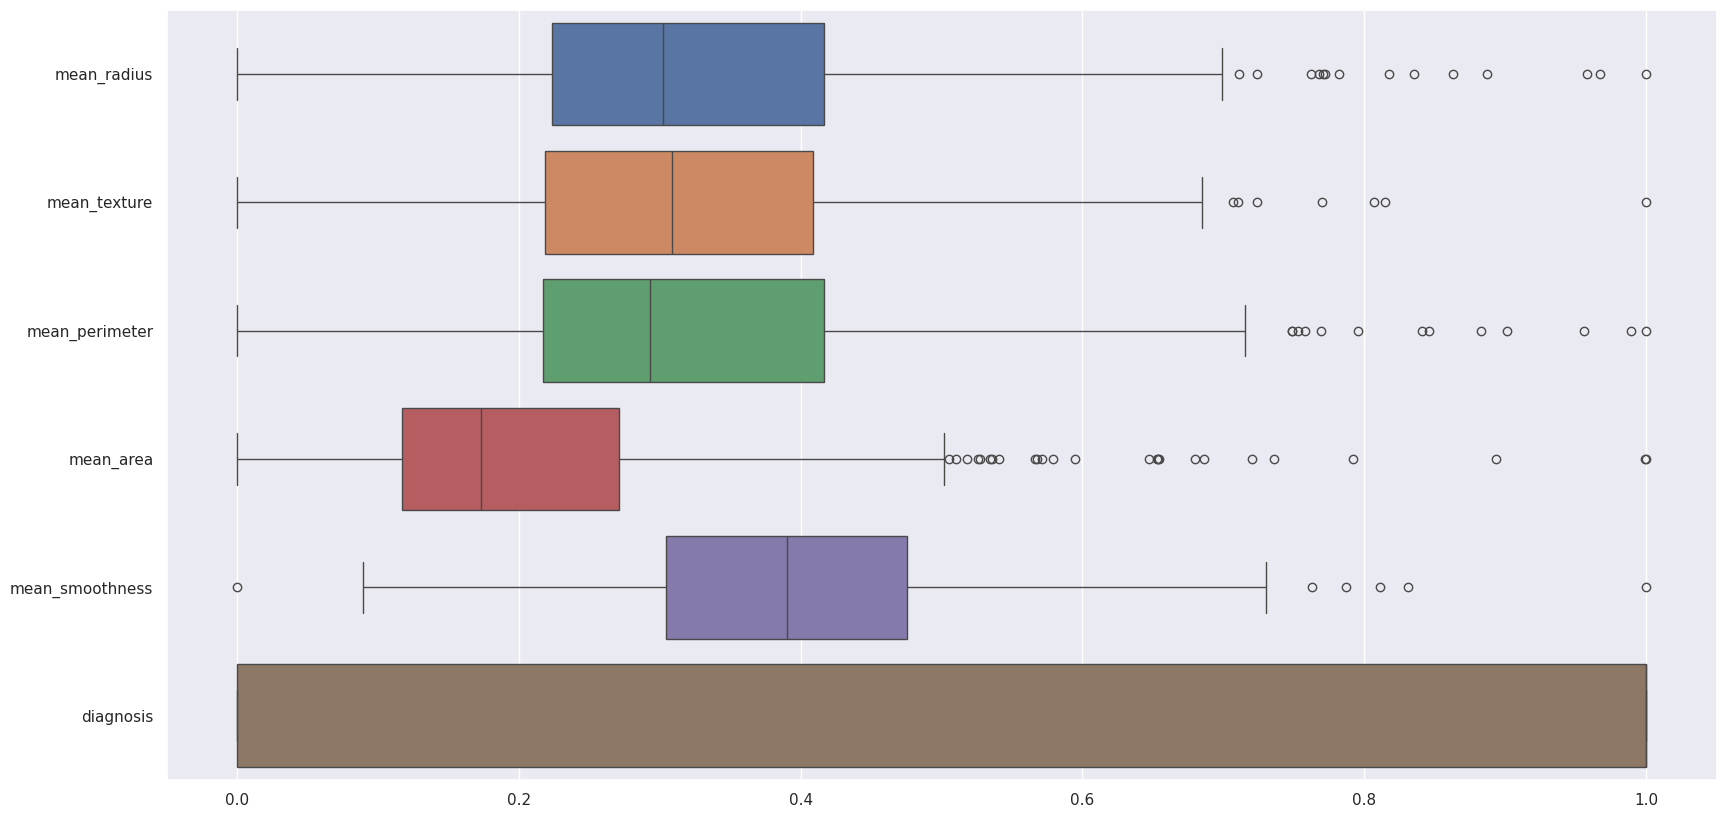

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h')

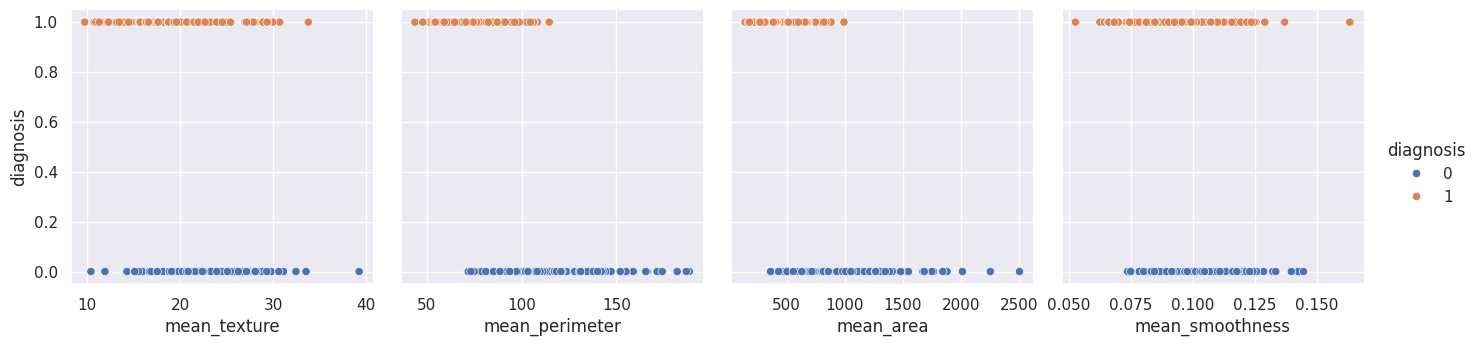

In [13]:
sns.pairplot(data, hue='diagnosis', y_vars=['diagnosis'], x_vars=data.columns[1:-1], height=3.5)
plt.show()

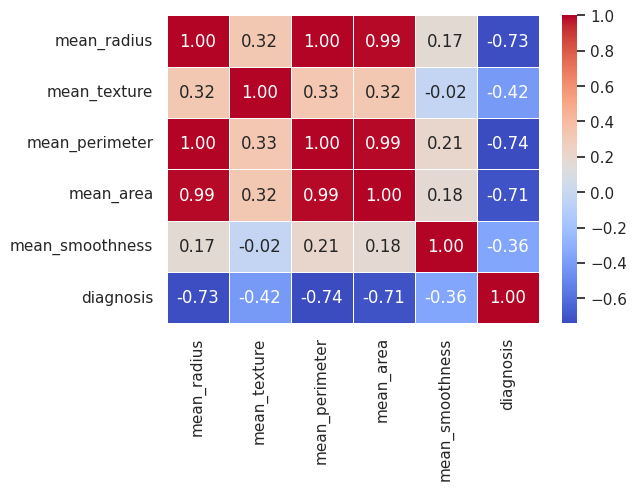

In [14]:
correlations = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
predictions = model.predict(x_test)

train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, predictions)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.94
Testing Accuracy: 0.92


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        52
           1       0.96      0.90      0.93        91

    accuracy                           0.92       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



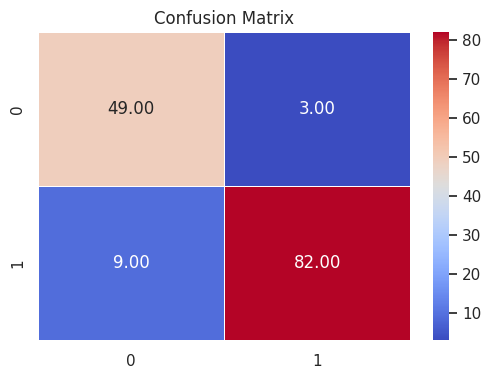

In [21]:
confusion_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()